In [5]:

import json
import glob

json_files = glob.glob("../run_*.json")

# sort by name, where name is run_idx.json
json_files.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
data = []
for file in json_files:
    with open(file, "r") as f:
        strdict = json.load(f)
        param = strdict["parameters"]
        newdict = {}
        # add param dict
        newdict.update(param)
        # add loss
        newdict["loss"] = strdict["loss"]
        newdict['iteration'] = strdict['iteration']
        data.append(newdict)
    


In [6]:
# make it dataframe
import pandas as pd
df = pd.DataFrame(data)

df.columns

Index(['learning_rate', 'weight_decay', 'lr_wtexweight', 'lr_attnxc_qxweight',
       'lr_attnxc_kxweight', 'lr_attnxc_vxweight', 'lr_attnxc_projxweight',
       'lr_mlpxc_fcxweight', 'lr_mlpxc_projxweight', 'lr_lm_headxweight',
       'lr_lamb1', 'lr_lamb2', 'initstd_wtexweight', 'initstd_attnxc_qxweight',
       'initstd_attnxc_kxweight', 'initstd_attnxc_vxweight',
       'initstd_attnxc_projxweight', 'initstd_mlpxc_fcxweight',
       'initstd_mlpxc_projxweight', 'initstd_lm_headxweight', 'initstd_lamb1',
       'initstd_lamb2', 'loss', 'iteration'],
      dtype='object')

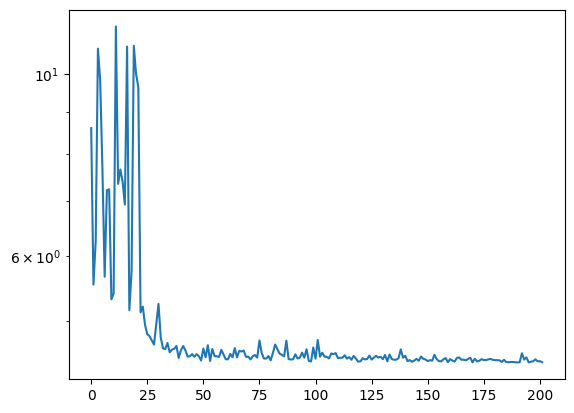

In [8]:
# plot x : iter, y : loss, y : logscale
import matplotlib.pyplot as plt
plt.plot(df['iteration'], df['loss'])
plt.yscale('log')
plt.show()

# plot x : iter, y : loss, y : logscale


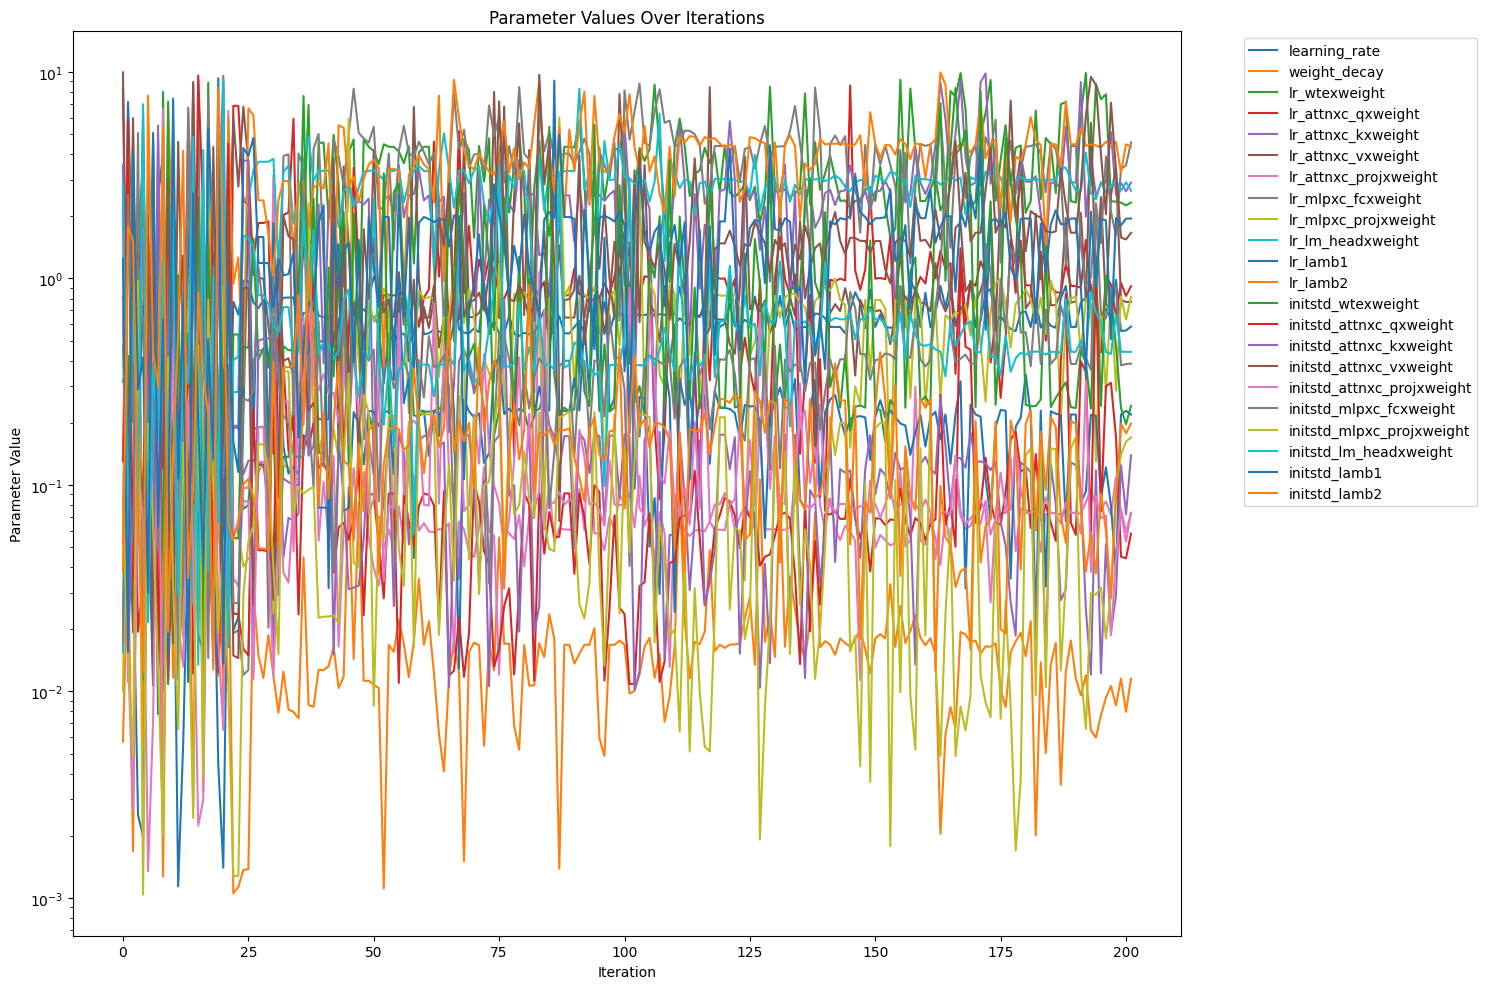

In [9]:
# plot how each parameter changes

col_to_plot = [col for col in df.columns if col not in ['iteration', 'loss']]

# make one plot : x is iter, y is value for each col, log scale
plt.figure(figsize=(15, 10))
for col in col_to_plot:
    plt.plot(df['iteration'], df[col], label=col)
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Values Over Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.show()


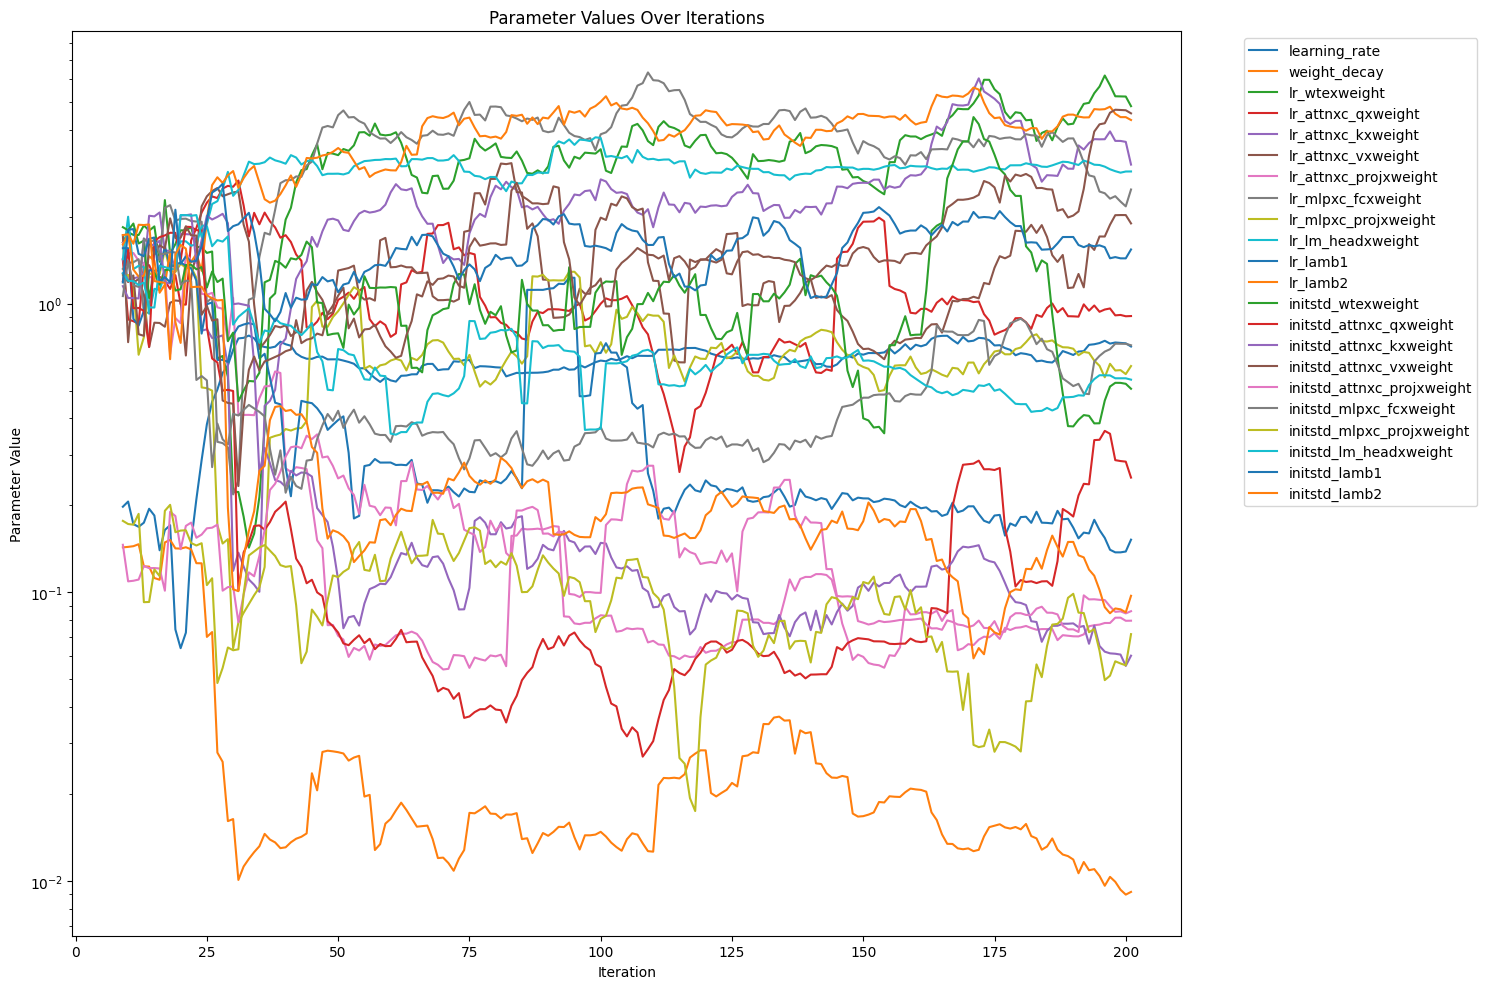

In [11]:



# make one plot : x is iter, y is value for each col, log scale
plt.figure(figsize=(15, 10))
for col in col_to_plot:
    moving_average = df[col].rolling(window=10).mean()
    plt.plot(df['iteration'], moving_average, label=col)
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Values Over Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.show()


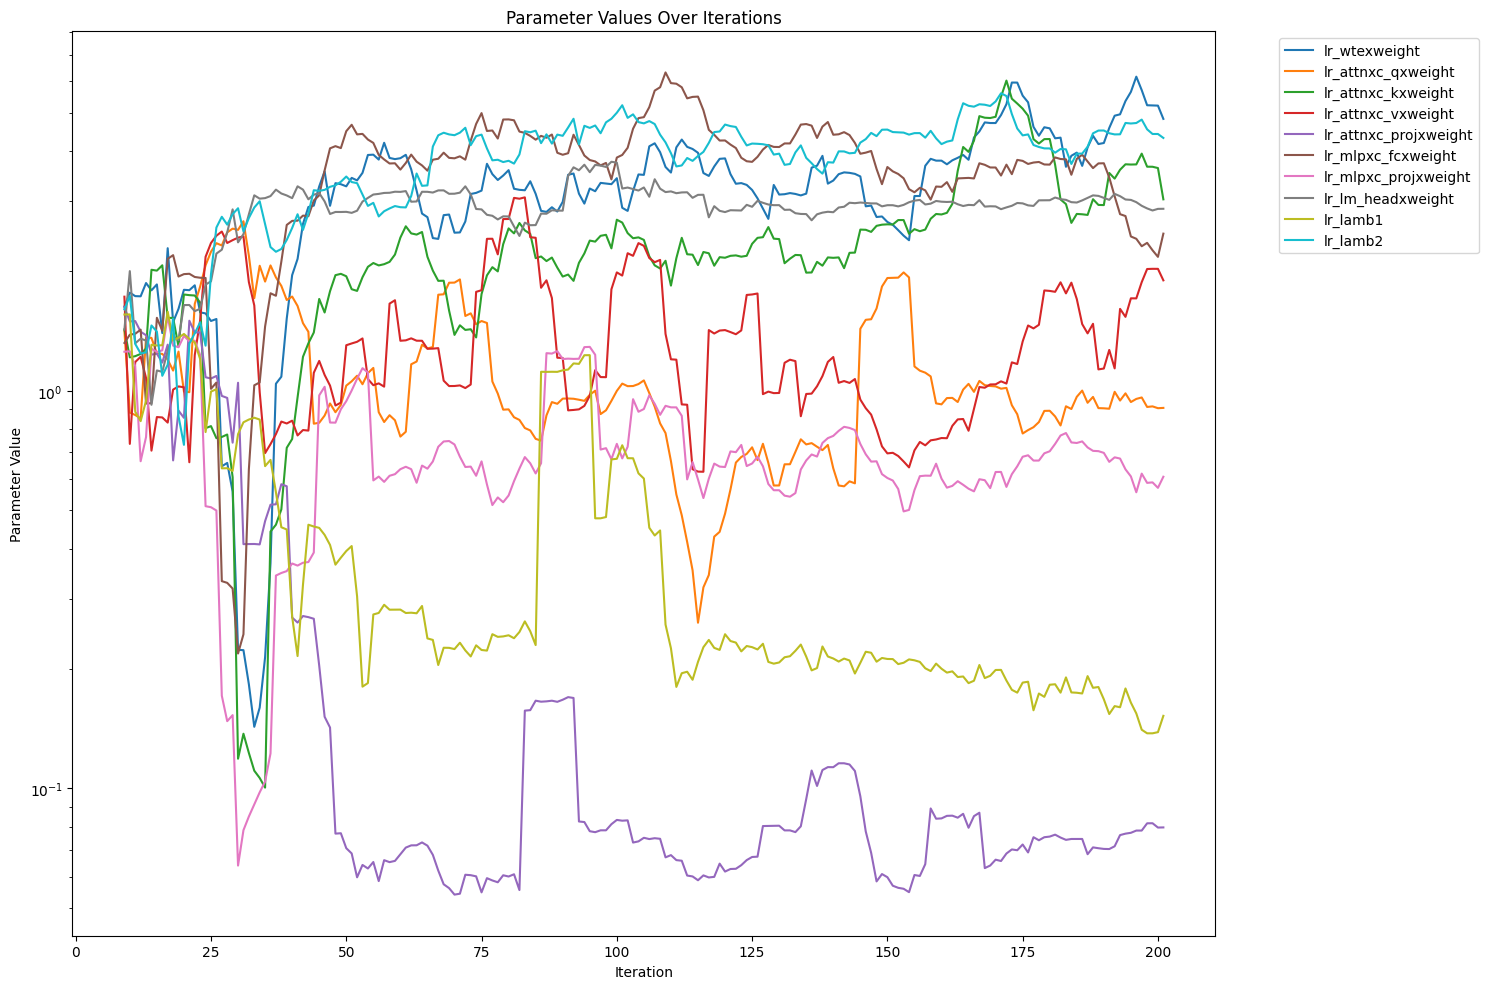

In [12]:
# plot stuff starts with lr
col = [col for col in df.columns if col.startswith('lr_')]

# make one plot : x is iter, y is value for each col, log scale
plt.figure(figsize=(15, 10))
for col in col:
    moving_average = df[col].rolling(window=10).mean()
    plt.plot(df['iteration'], moving_average, label=col)
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Values Over Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.show()


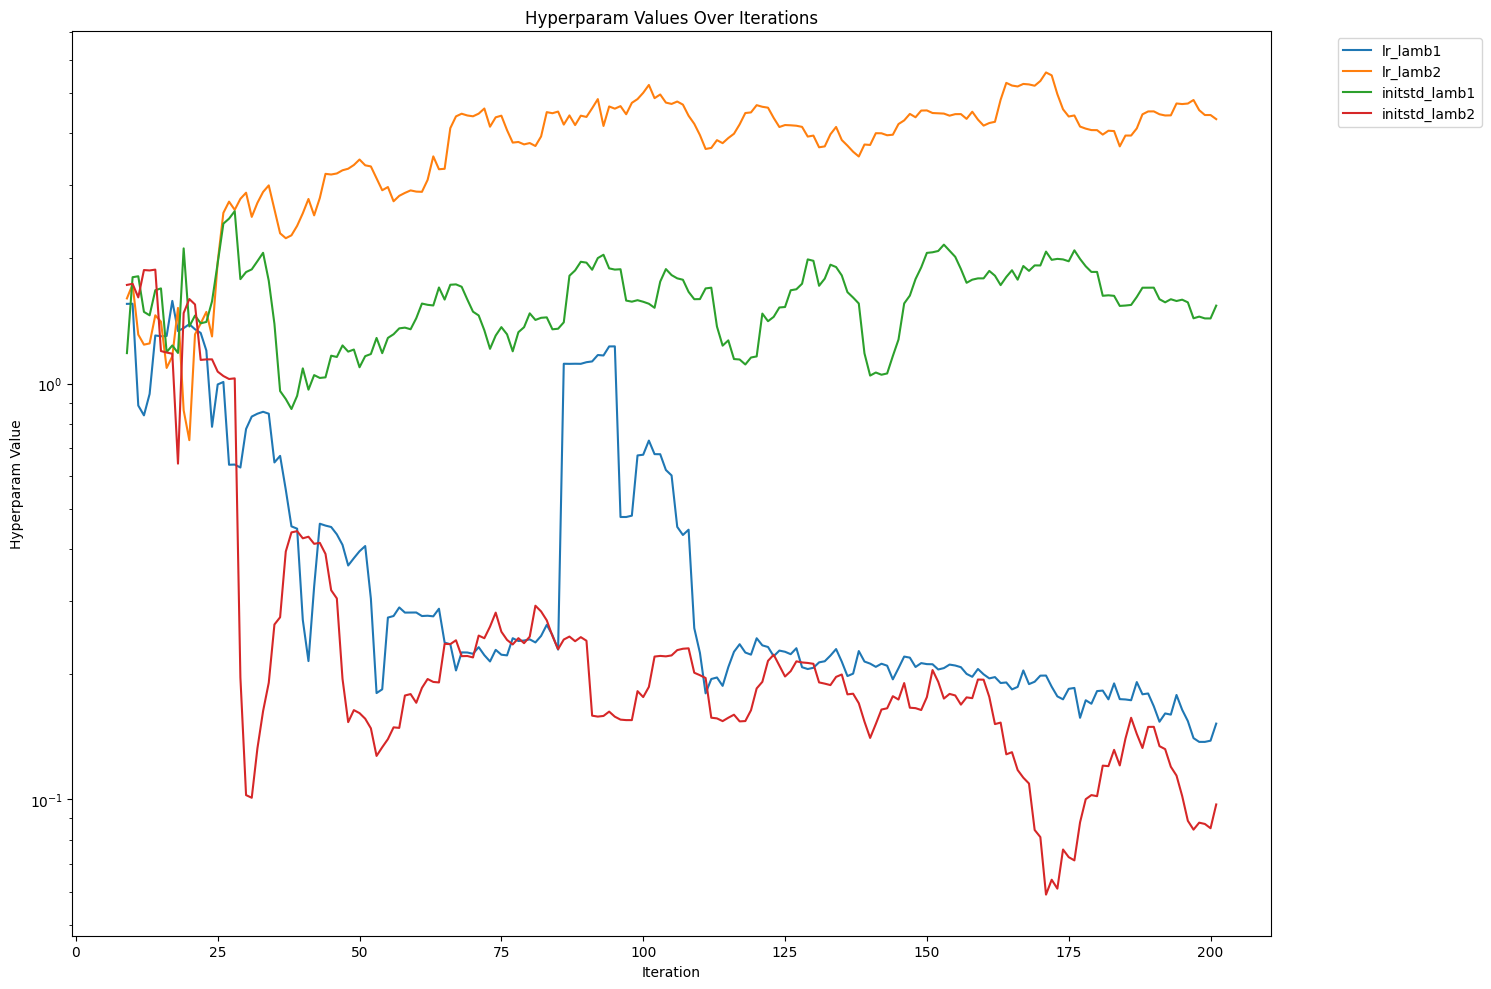

In [13]:
col = [col for col in df.columns if 'lamb' in col]

# make one plot : x is iter, y is value for each col, log scale
plt.figure(figsize=(15, 10))
for col in col:
    moving_average = df[col].rolling(window=10).mean()
    plt.plot(df['iteration'], moving_average, label=col)
plt.xlabel('Iteration')
plt.ylabel('Hyperparam Value')
plt.title('Hyperparam Values Over Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.show()

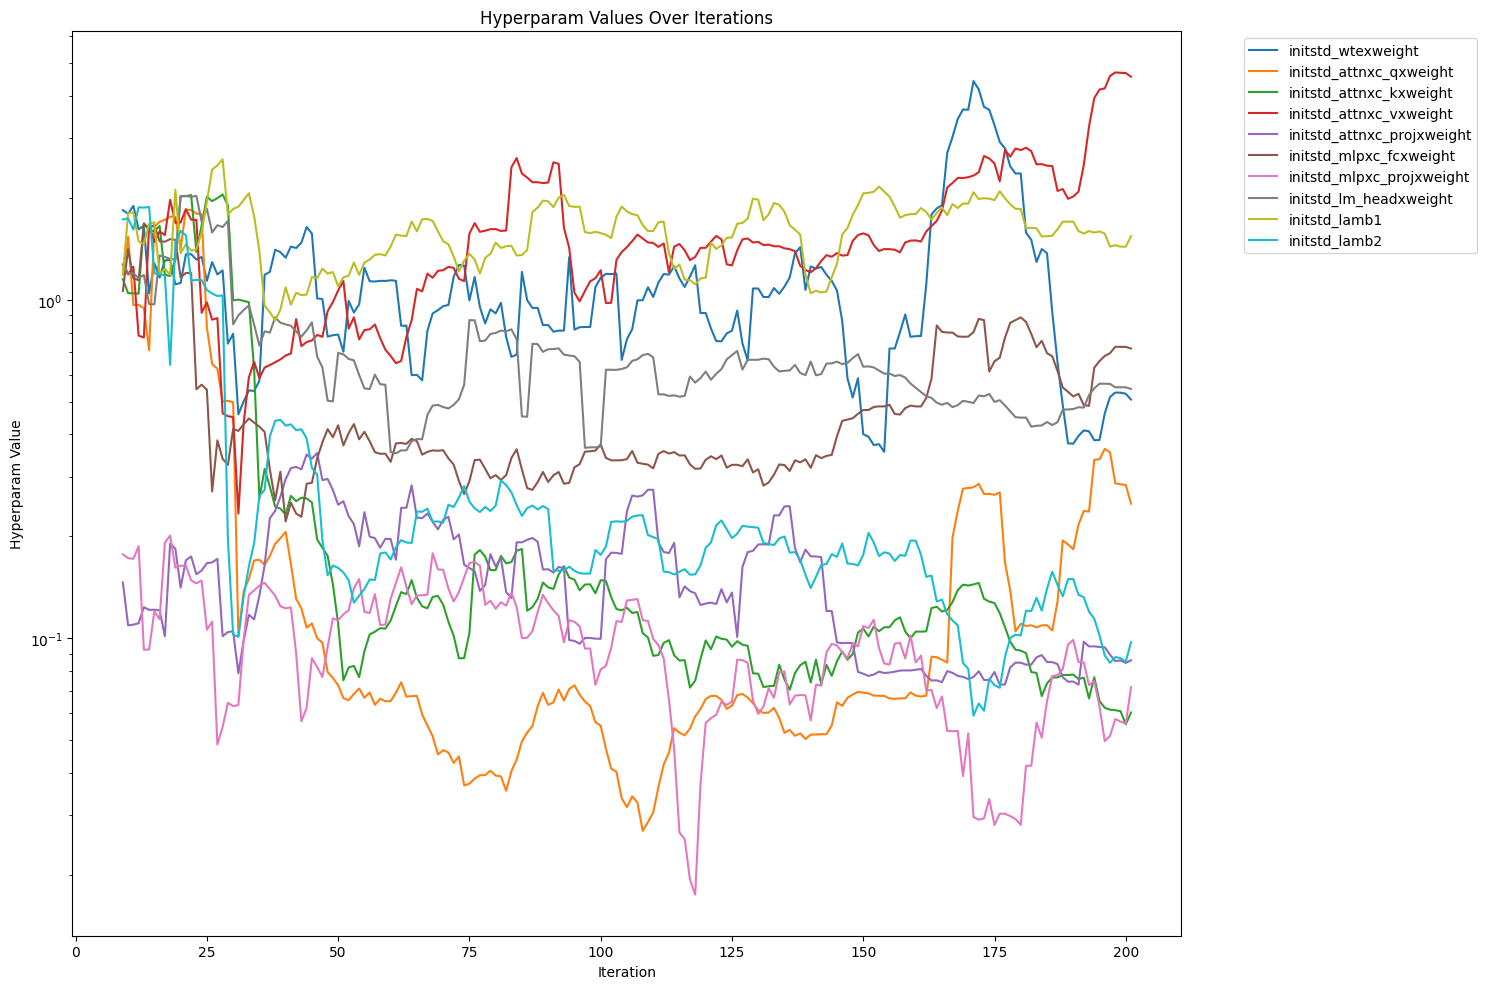

In [14]:
col = [col for col in df.columns if col.startswith('initstd_')]

# make one plot : x is iter, y is value for each col, log scale
plt.figure(figsize=(15, 10))
for col in col:
    moving_average = df[col].rolling(window=10).mean()
    plt.plot(df['iteration'], moving_average, label=col)
plt.xlabel('Iteration')
plt.ylabel('Hyperparam Value')
plt.title('Hyperparam Values Over Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [18]:
# lets average last 5 parameter
import numpy as np
stat_to_average = [col for col in df.columns if col not in ['iteration', 'loss']]

df_last_5 = df.iloc[-5:]
df_last_5_avg = df_last_5[stat_to_average].apply(np.log).mean().apply(np.exp)

print(df_last_5_avg)
as_cmd = ""
for col in stat_to_average:
    as_cmd += f"{col}={df_last_5_avg[col]} \\ \n"
print(as_cmd)


learning_rate                 0.648165
weight_decay                  0.009923
lr_wtexweight                 2.329717
lr_attnxc_qxweight            0.849565
lr_attnxc_kxweight            3.111222
lr_attnxc_vxweight            1.324961
lr_attnxc_projxweight         0.074103
lr_mlpxc_fcxweight            2.844033
lr_mlpxc_projxweight          0.633284
lr_lm_headxweight             2.808941
lr_lamb1                      0.126998
lr_lamb2                      4.183496
initstd_wtexweight            0.337668
initstd_attnxc_qxweight       0.090669
initstd_attnxc_kxweight       0.058924
initstd_attnxc_vxweight       2.499082
initstd_attnxc_projxweight    0.048777
initstd_mlpxc_fcxweight       0.537480
initstd_mlpxc_projxweight     0.102824
initstd_lm_headxweight        0.477331
initstd_lamb1                 1.470800
initstd_lamb2                 0.111030
dtype: float64
learning_rate=0.6481647634663134 \ 
weight_decay=0.009923294859106755 \ 
lr_wtexweight=2.3297169631609482 \ 
lr_attnxc_qxweight

: 